# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('cars.csv')
data.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [8]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

data['No_of_Owners'] = data['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd': 3, '4th': 4})

cat_cols = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
unique_values = {col: data[col].unique() for col in cat_cols}

unique_values, data.head()

({'Make': array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
         'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
         'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object),
  'Color': array(['silver', 'red', 'white', 'bronze', 'orange', 'grey', 'blue',
         'yellow', 'beige', 'brown', 'golden', 'black', 'maroon', 'purple',
         'green'], dtype=object),
  'Body_Type': array(['sedan', 'crossover', 'suv', 'hatchback', 'muv'], dtype=object),
  'Fuel_Type': array(['diesel', 'petrol', 'petrol+cng'], dtype=object),
  'Transmission': array(['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed'], dtype=object),
  'Transmission_Type': array(['Automatic', 'Manual'], dtype=object)},
          Make  Make_Year   Color  Body_Type  Mileage_Run  No_of_Owners  \
 0  Volkswagen       2017  silver      sedan        44611             1   
 1     Hyundai       2016     red  crossover        20305             1   
 2       Honda       2019   white        su

In [9]:
cat_cols = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

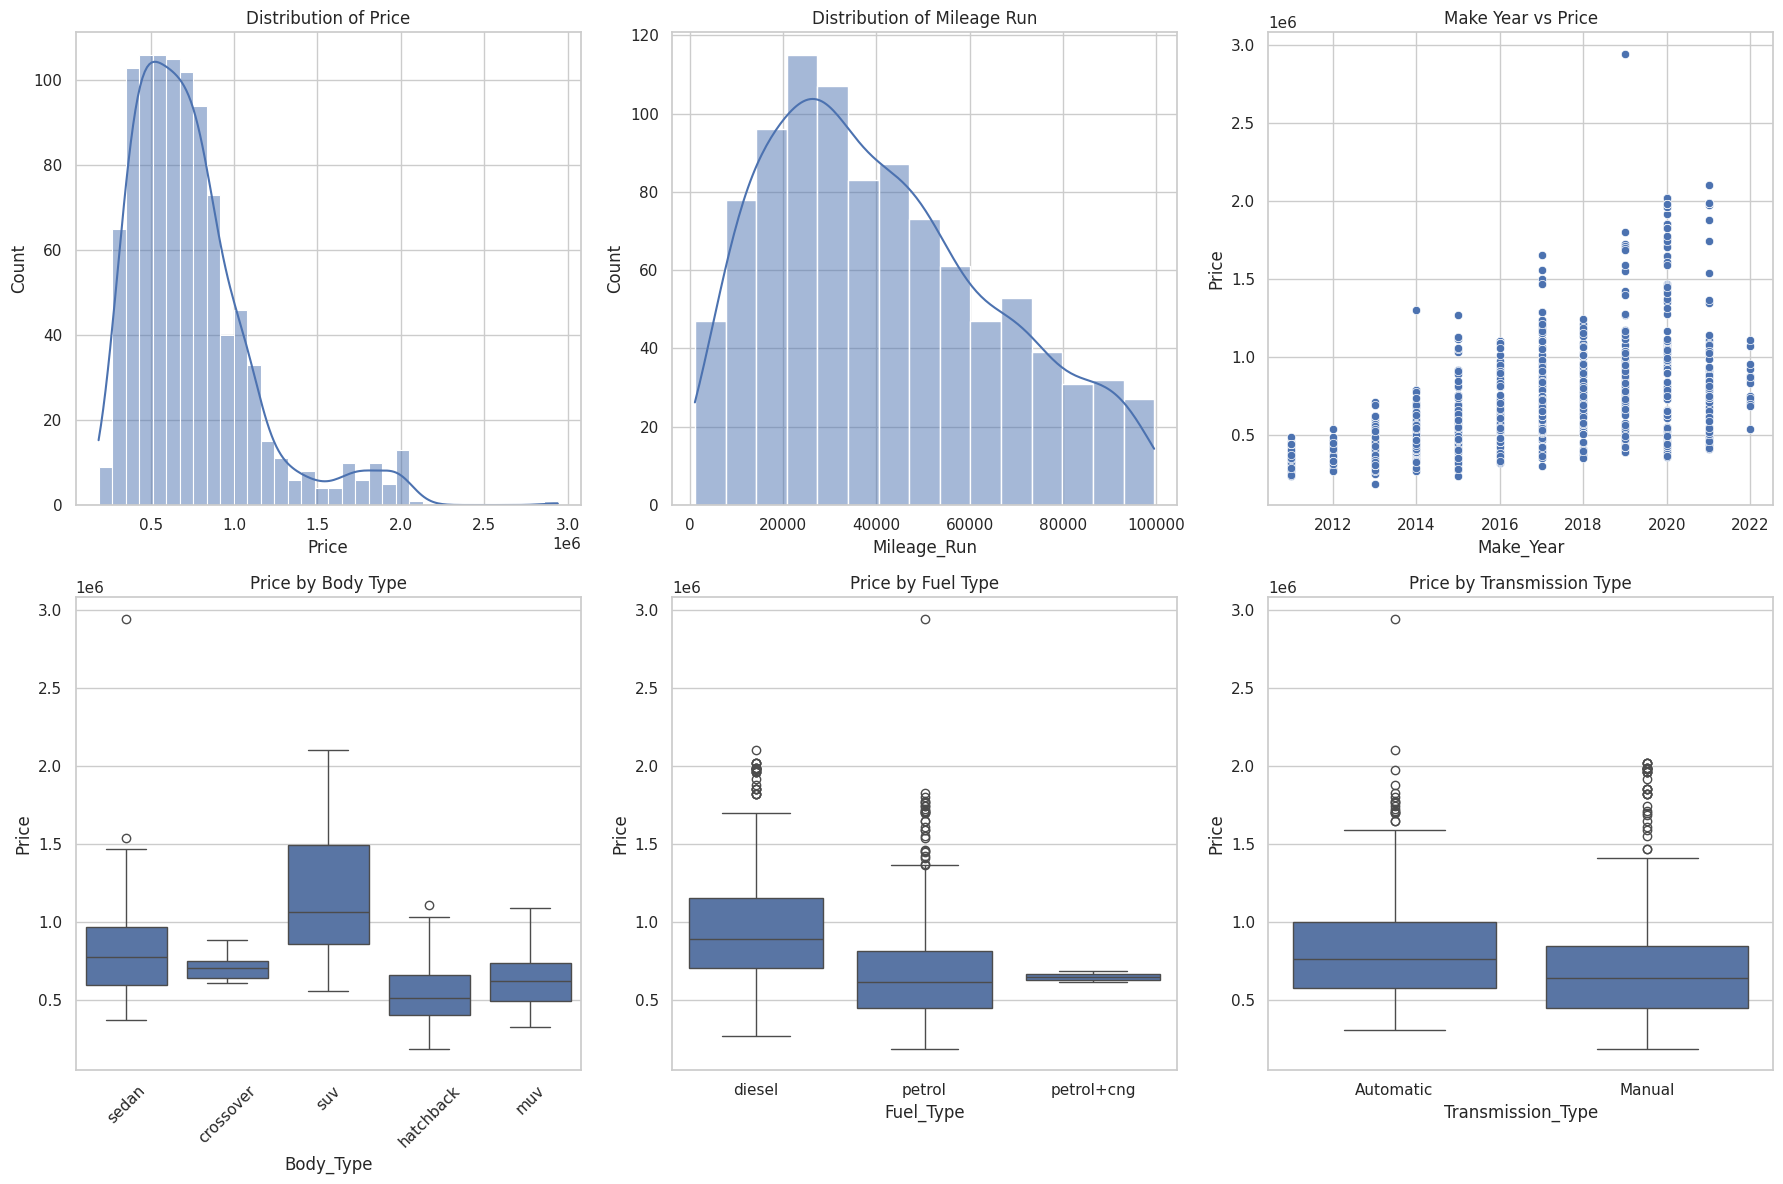

In [14]:
sns.set(style="whitegrid")

# plot distributions and relationships with price
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# distribution of price
sns.histplot(data['Price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Price')

# distribution of mileage run
sns.histplot(data['Mileage_Run'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Mileage Run')

# relationship between make_year and price
sns.scatterplot(x='Make_Year', y='Price', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Make Year vs Price')

# body type
sns.boxplot(x='Body_Type', y='Price', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Price by Body Type')
axes[1, 0].tick_params(axis='x', rotation=45)

# fuel type
sns.boxplot(x='Fuel_Type', y='Price', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Price by Fuel Type')

# transmission type
sns.boxplot(x='Transmission_Type', y='Price', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Price by Transmission Type')

plt.tight_layout()
plt.show()

In [15]:
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#basic linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# calculate rmse and r^2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Simple Linear Model Performance:")
print(f"Training RMSE: {train_rmse}, Training R^2: {train_r2}")
print(f"Testing RMSE: {test_rmse}, Testing R^2: {test_r2}")

Simple Linear Model Performance:
Training RMSE: 142154.19343476923, Training R^2: 0.8552247578997088
Testing RMSE: 143815.30276718995, Testing R^2: 0.8196717007174028


In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# train the model on polynomial-transformed data
complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train)

# predictions for complex model
y_train_poly_pred = complex_model.predict(X_train_poly)
y_test_poly_pred = complex_model.predict(X_test_poly)

# calculate rmse and r^2 for complex model
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))
train_r2_poly = r2_score(y_train, y_train_poly_pred)
test_r2_poly = r2_score(y_test, y_test_poly_pred)

print("\nComplex Model Performance:")
print(f"Training RMSE: {train_rmse_poly}, Training R^2: {train_r2_poly}")
print(f"Testing RMSE: {test_rmse_poly}, Testing R^2: {test_r2_poly}")


Complex Model Performance:
Training RMSE: 74611.76796289875, Training R^2: 0.9601168354231957
Testing RMSE: 2745979.7417377527, Testing R^2: -64.74282240297424


From the data cleaning, I changed all the categorical values to ensure they were one-hot-encoded so they could be used for regression analysis. I also removed the unnamed column since it was irrelevant. The visualizations of the data was helpful to look at since it helped me to see that the price distribution was rightly skewed, which meant that the pricier cars were outliers. The simple linear model was able to get the general trend of the model but it is less accurate due to the simplicity. The model had moderate R^2 scores of 0.82 which means that it was not the most accurate and shows potential underfitting. The complex model had a better performance with the training data with a R^2 value of 0.96 but also had difficulty with the testing data since it had a R^2 calue of -64.74. This suggests extreme overfitting with the testing data and this means that a more diverse dataset would be more beneficial when modeling. While the complex model would be a better model, the simple linear one performs better in this case.